In [1]:
import pandas as pd
import bibtex_tools as bt
import community
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from importlib import reload
reload(bt);
%config Completer.use_jedi=False


In [121]:
rr_refs = bt.ref_dict.load('rr_refs.pickle')

In [122]:
type(rr_refs)

bibtex_tools.ref_dict

In [123]:
print(rr_refs.__repr__()[:500])

{'Yang Lou and Zhang-2018': [{'author': 'Arani, H and Rabbani, M and Rafiei, H', 'title': 'A revenue-sharing option contract toward coordination of supply chains', 'journal': 'International Journal of Production Economics', 'year': '2016', 'pages': '42--56', 'volume': '178', 'author_list': [('Arani', 'H'), ('Rabbani', 'M'), ('Rafiei', 'H')], 'nickname': 'arani2016revenuesharing', 'source': 'revenue-review'}, {'author': 'Arya, A and Mittendorf, B and Sappington, D', 'title': 'The bright side of s


In [124]:
sum(len(v) for v in rr_refs.values())

5305

In [125]:
Counter(sum([[a.get('nickname','na') for a in v] for v in rr_refs.values()],[])).most_common(40)

[('cachon2005supply', 84),
 ('wang2004channel', 46),
 ('cachon2003supply', 44),
 ('__missing__', 43),
 ('giannoccaro2004supply', 29),
 ('pasternack1985optimal', 28),
 ('petruzzi1999pricing', 25),
 ('gerchak2004revenuesharing', 25),
 ('lariviere2001selling', 25),
 ('li2009supply', 24),
 ('yao2008manufacturers', 22),
 ('choi1991price', 21),
 ('jeuland1983managing', 20),
 ('dana2001revenue', 19),
 ('tsay1999quantity', 17),
 ('li2008note', 16),
 ('linh2009channel', 16),
 ('ru2010consignment', 15),
 ('wang2006joint', 15),
 ('spengler1950vertical', 14),
 ('taylor2002supply', 14),
 ('emmons1998role', 14),
 ('pan2010revenuesharing', 14),
 ('cachon2004allocation', 13),
 ('lariviere1999supply', 12),
 ('cachon2001contracting', 12),
 ('chiang2003direct', 11),
 ('bernstein2005decentralized', 11),
 ('weng1995channel', 11),
 ('mortimer2008vertical', 11),
 ('raju2005channel', 11),
 ('xu2014coordinating', 10),
 ('mcguire1983industry', 10),
 ('koulamas2006newsvendor', 10),
 ('bhaskaran2009effort', 9),
 

In [126]:
rr_graph= rr_refs.to_bib_coupling_graph()

In [127]:
partition = community.best_partition(rr_graph,random_state=44)
community.modularity(partition,rr_graph)

0.14618510998983908

In [128]:
#pos = nx.drawing.layout.spring_layout(rr_graph,k=1.7, seed = 80)
pos = nx.drawing.layout.spring_layout(rr_graph,k=1.7, seed = 80)


In [129]:

explode_angle = np.pi/5
ea = explode_angle

In [130]:
diam = 1.2
mn = np.vstack(list(pos.values())).mean(axis=0)
pos1 = {k: v-mn  +diam*np.array([np.cos(partition[k]*ea), np.sin(partition[k]*ea)]) for k,v in pos.items()}

In [131]:
Counter(partition.values())

Counter({0: 22, 7: 24, 2: 1, 3: 34, 6: 18, 1: 38, 4: 1, 5: 1})

In [132]:
edges_to_del = [e for e in rr_graph.edges() if partition[e[0]]!=partition[e[1]] ]
rr_graph_iso = rr_graph.copy()
rr_graph_iso.remove_edges_from(edges_to_del)

In [133]:
edge_weights = {k: v['weight'] for k,v in rr_graph.edge_attr_dict_factory(rr_graph.edges()).items()}

#part_to_part_weight = sum(Counter{ }

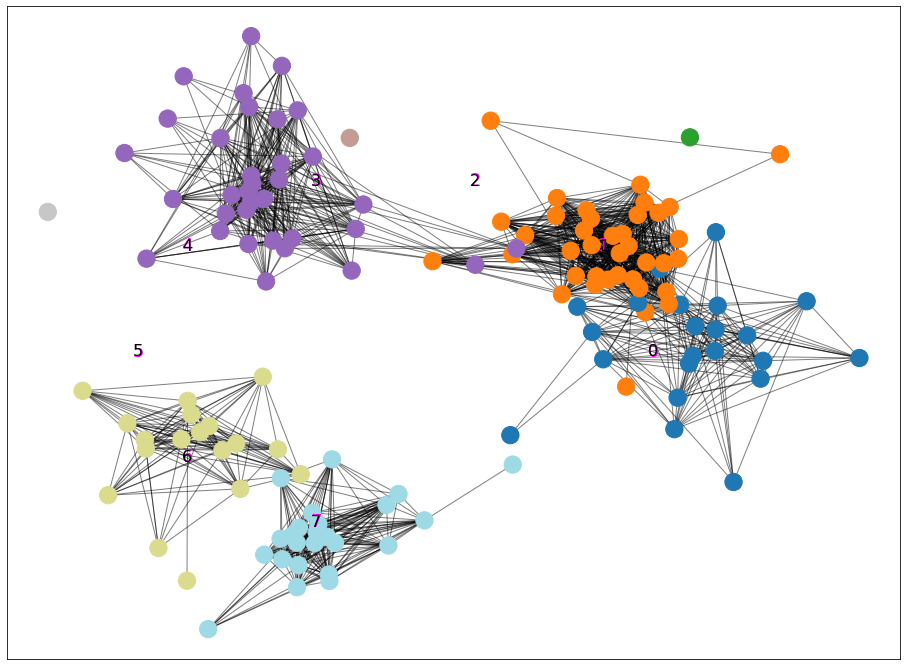

In [134]:
plt.figure(figsize=(16,12))
cmap = cm.get_cmap('tab20', max(partition.values()) +3)
nx.draw_networkx_nodes(rr_graph,pos1, partition.keys(), cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(rr_graph_iso, pos1, alpha=0.5)

fd={'horizontalalignment': 'center', 'verticalalignment': 'center', }
for a in range(8):
    plt.text(diam*np.cos(a*ea), diam*np.sin(a*ea), str(a), **fd, size=18, color='magenta' )
    plt.text(diam*np.cos(a*ea), diam*np.sin(a*ea), str(a), **fd, size=16)

No handles with labels found to put in legend.


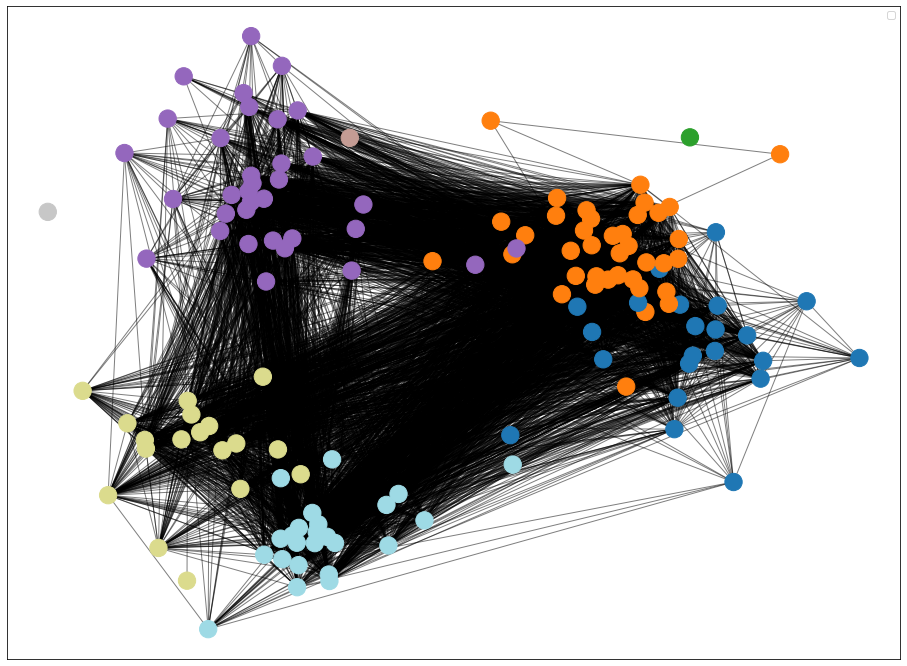

In [135]:
plt.figure(figsize=(16,12))
cmap = cm.get_cmap('tab20', max(partition.values()) +3)
nx.draw_networkx_nodes(rr_graph,pos1, partition.keys(), cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(rr_graph, pos1, alpha=0.5)
plt.legend()

In [136]:

ref_df = pd.DataFrame(data = list(partition.items()), columns=['File','Cluster'])
                      
ref_df
                     # {'File': list(rr_graph) 'cluster': list(partici)}

,File,Cluster
0,Yang Lou and Zhang-2018,0
1,Fang et al. 2016,7
2,Wang 2006,2
3,Lin et al. 2010,3
4,Yao et al. 2008b,7
...,...,...
134,Lu et al-2018-EJOR,0
135,Zhang et al 2010-Revenue sharing with multiple...,1
136,Yan et al-2018-EJOR,0
137,Chen et al 2017,7


In [137]:

partition.__repr__()

"{'Yang Lou and Zhang-2018': 0, 'Fang et al. 2016': 7, 'Wang 2006': 2, 'Lin et al. 2010': 3, 'Yao et al. 2008b': 7, 'Dana and  Spier 2001-Revenue Sharing and Vertical Control in the Video Rental Industry': 3, 'Wang and Shin 2014': 0, 'check-Li et al 2009-Supply chain coordination and decision making under consignment contract with revenue sharing': 7, 'RAZA 2018': 3, 'He et al 2017': 6, 'Choi and He-2019': 3, 'Cachon et al-2005': 3, 'Gerchak and Wang 2004-full version': 3, 'Lee and Rhee-2010-IJPE': 3, 'Wang et al 2012 (1)': 6, 'van der Veen and Venugopal 2005-Using Revenue Sharing to Create Win-Win in the Video Rental Supply Chain': 3, 'Becker-Peth and Thonemann 2016-Reference points in revenue sharing contracts—How to design optimal': 1, 'Dong et al 2016': 7, 'Sarathi et al 2014-An integrated revenue sharing and quantity discounts contract': 3, 'Zhang et al 2019': 0, 'Ru and Wang 2010- consignment contracts': 7, 'Palsule-Desai 2013-Supply chain coordination using revenue-dependent rev